In [1]:
!pip install tensorflow tensorflow_datasets matplotlib


In [3]:
import tensorflow_datasets as tfds

dataset, info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.3ZWVR3_2.1.1/oxford_flowers102-train.tfrecord…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.3ZWVR3_2.1.1/oxford_flowers102-test.tfrecord*…

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.3ZWVR3_2.1.1/oxford_flowers102-validation.tfr…

Dataset oxford_flowers102 downloaded and prepared to /root/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


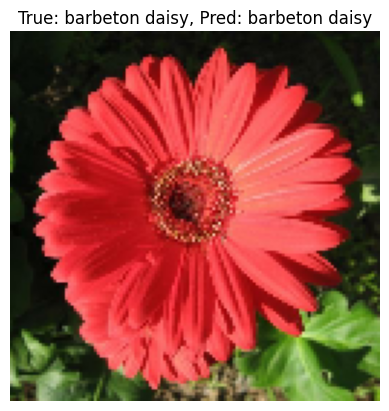

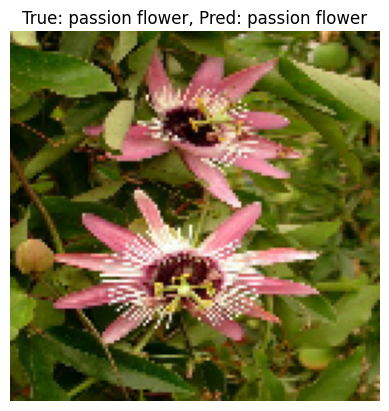

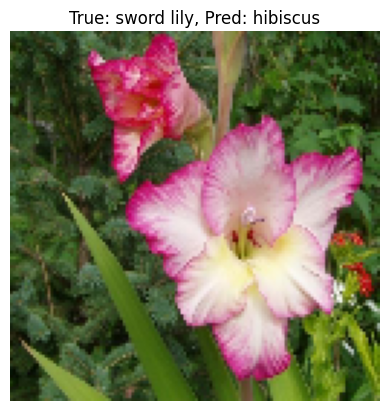

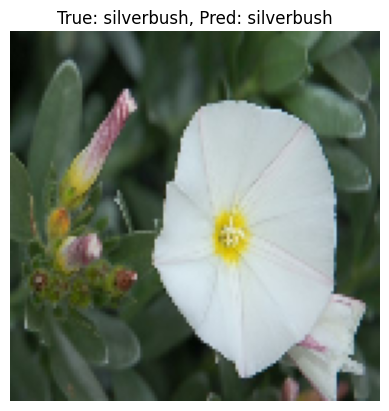

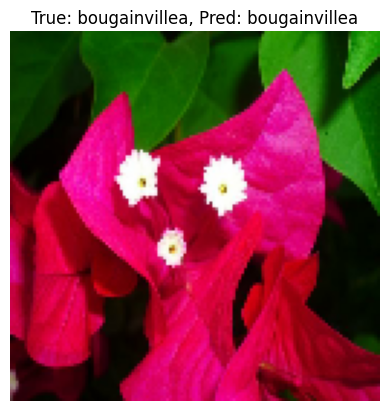

In [13]:
import numpy as np
import matplotlib.pyplot as plt

for images, labels in test_ds.take(1):
    preds = model.predict(images)
    preds_classes = np.argmax(preds, axis=1)

    for i in range(5):
        plt.figure()
        plt.imshow(images[i])
        plt.title(f"True: {label_names[labels[i].numpy()]}, Pred: {label_names[preds_classes[i]]}")
        plt.axis('off')
        plt.show()



In [6]:
import tensorflow as tf

IMG_SIZE = 128
BATCH_SIZE = 32

def preprocess(image, label):

    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))

    image = image / 255.0
    return image, label


train_ds = dataset['train'].map(preprocess).batch(BATCH_SIZE).shuffle(1000)
val_ds = dataset['validation'].map(preprocess).batch(BATCH_SIZE)
test_ds = dataset['test'].map(preprocess).batch(BATCH_SIZE)


In [7]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model = MobileNetV2(input_shape=(128,128,3), include_top=False, weights='imagenet')
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(102, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 102)            │       130,662 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,388,646 (9.11 MB)

 Trainable params: 130,662 (510.40 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [8]:
EPOCHS = 5

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)


Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 562ms/step - accuracy: 0.0494 - loss: 4.8839 - val_accuracy: 0.3324 - val_loss: 2.9885
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 554ms/step - accuracy: 0.6130 - loss: 2.0418 - val_accuracy: 0.5873 - val_loss: 1.9234
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 508ms/step - accuracy: 0.8977 - loss: 0.8628 - val_accuracy: 0.6745 - val_loss: 1.5401
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 505ms/step - accuracy: 0.9707 - loss: 0.5128 - val_accuracy: 0.7176 - val_loss: 1.3520
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 548ms/step - accuracy: 0.9941 - loss: 0.2939 - val_accuracy: 0.7245 - val_loss: 1.2510


193/193 ━━━━━━━━━━━━━━━━━━━━ 54s 280ms/step - accuracy: 0.6829 - loss: 1.3744
Test Accuracy: 0.6887298822402954


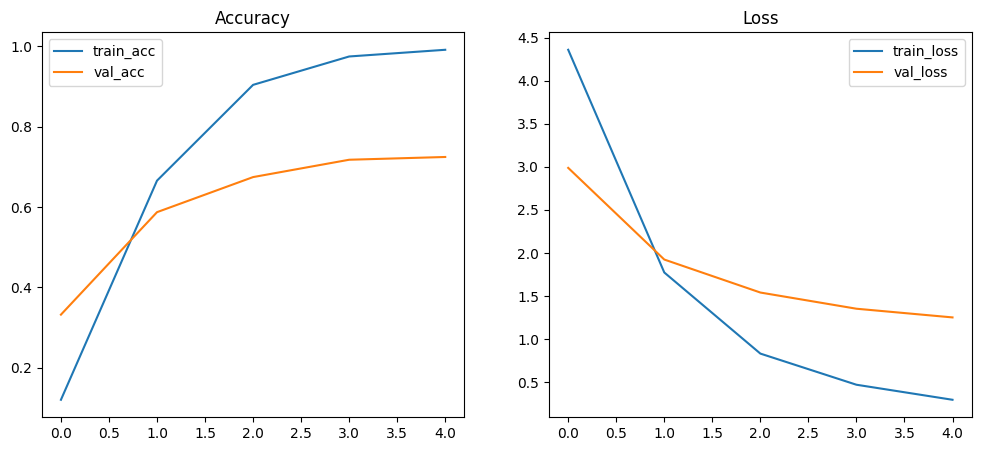

In [9]:
test_loss, test_acc = model.evaluate(test_ds)
print("Test Accuracy:", test_acc)

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


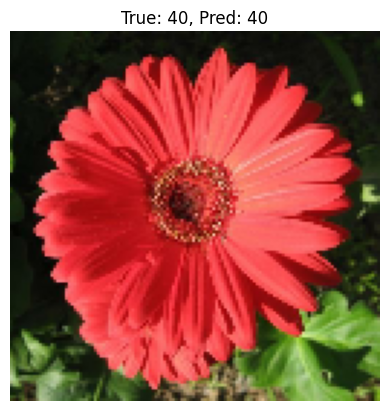

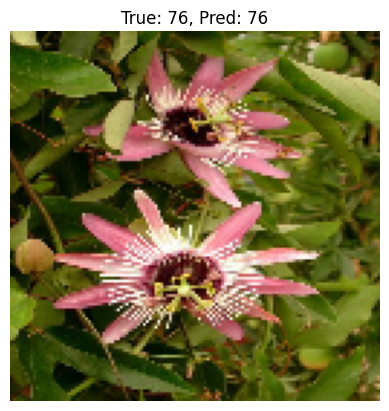

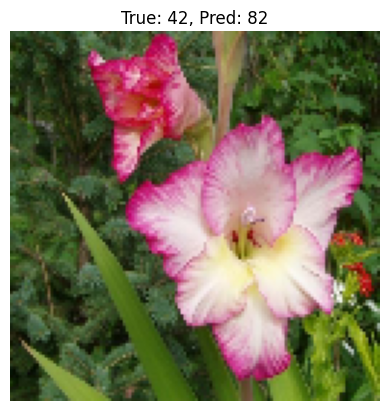

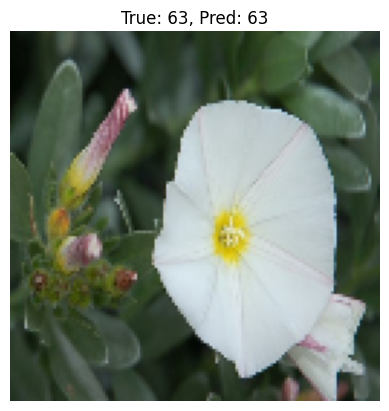

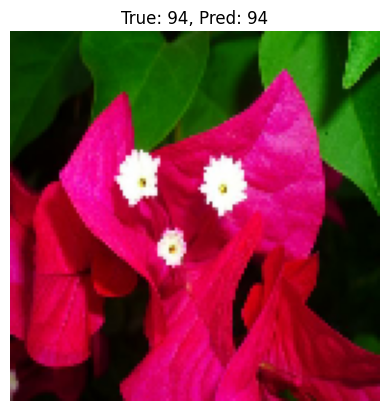

In [10]:
import numpy as np

for images, labels in test_ds.take(1):
    preds = model.predict(images)
    preds_classes = np.argmax(preds, axis=1)

    for i in range(5):
        plt.figure()
        plt.imshow(images[i])
        plt.title(f"True: {labels[i].numpy()}, Pred: {preds_classes[i]}")
        plt.axis('off')
        plt.show()


In [12]:
label_names = info.features['label'].names
print(label_names[:10])


['pink primrose', 'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea', 'english marigold', 'tiger lily', 'moon orchid', 'bird of paradise', 'monkshood', 'globe thistle']


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

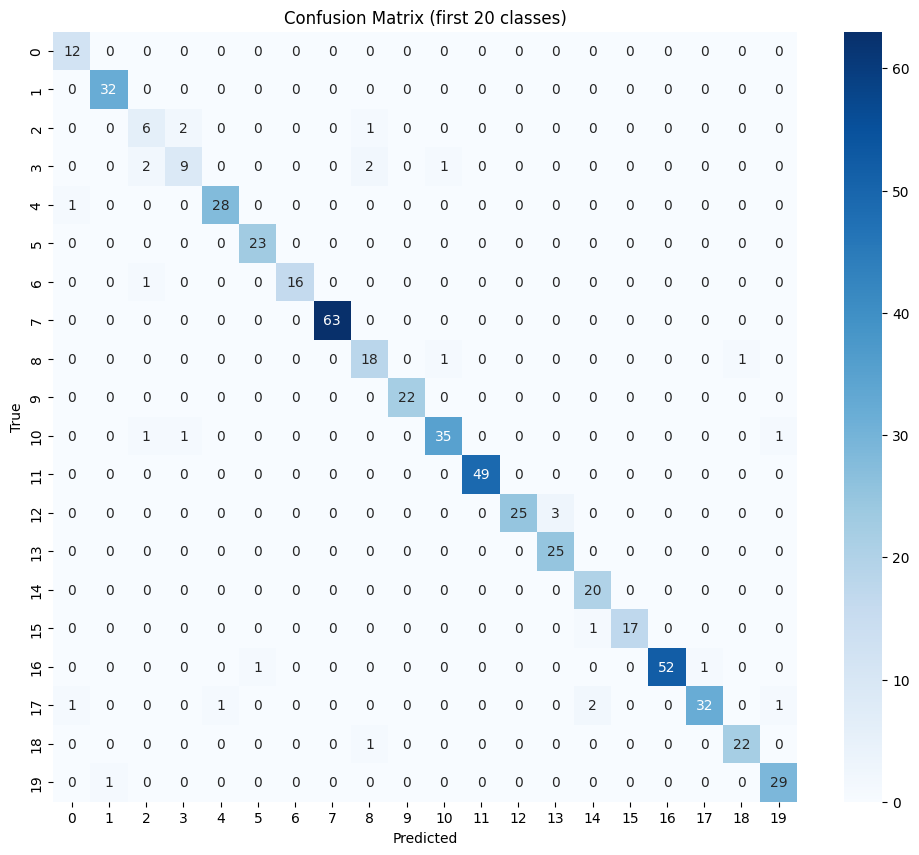

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)
    preds_classes = np.argmax(preds, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(preds_classes)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12,10))
sns.heatmap(cm[:20, :20], annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (first 20 classes)')
plt.show()


In [41]:
import numpy as np

preds = model.predict(tf.expand_dims(test_image, axis=0))[0]

top3_idx = preds.argsort()[-3:][::-1]

top3_classes = [label_names[i] for i in top3_idx]
top3_probs = [preds[i] for i in top3_idx]

for i, (cls, prob) in enumerate(zip(top3_classes, top3_probs)):
    print(f"Top {i+1}: {cls} ({prob:.2%})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Top 1: barbeton daisy (67.11%)
Top 2: sunflower (7.71%)
Top 3: osteospermum (7.19%)


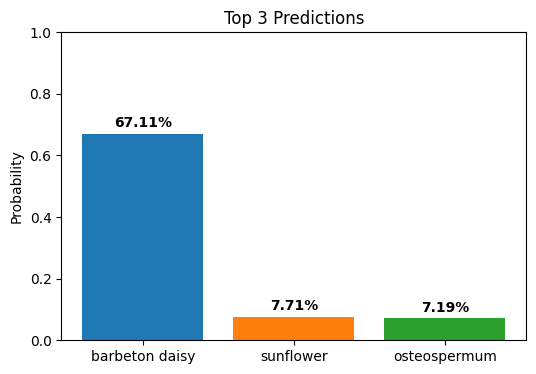

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(top3_classes, top3_probs, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.ylim(0, 1)
plt.ylabel('Probability')
plt.title('Top 3 Predictions')
for i, v in enumerate(top3_probs):
    plt.text(i, v + 0.02, f"{v:.2%}", ha='center', fontweight='bold')
plt.show()


# **Image Classifier with Top-3 Prediction Analysis**
# Overview

Built a computer vision model using MobileNetV2 to classify images and interpret predictions. Preprocessed data, trained the model, and evaluated performance with accuracy and confusion matrix.

# Top-3 Predictions

- Predicted top 3 classes for each test image with probabilities

- Visualized using a bar chart to show model confidence

- Highlights subtle class distinctions and uncertainty

# Results

- Test Accuracy: 0.6887

- Confusion Matrix

- Top-3 Predictions Bar Chart


# Conclusion

The project demonstrates accurate image classification and interpretable predictions. Top-3 analysis provides nuanced insight into model performance beyond simple accuracy.